In [52]:
import os
import collections
import json

import numpy as np
import pandas as pd
import seaborn as sns
import lovelyplots
import matplotlib.pyplot as plt

plt.style.use('ipynb')
# sns.set_style(style="darkgrid")

In [53]:
def find_dataset(results_file: str) -> str:
    for dataset in ["rmd17", "3bpa"]:
        if dataset in results_file:
            return dataset
    raise ValueError(f"Could not find dataset in {results_file}")

def format_results_file_name(results_file: str) -> str:
    if results_file.startswith("vsh-4channelold"):
        return "Old VGTP + GTP (4-channel)"

    if results_file.startswith("vsh-activations"):
        return "VGTP + GTP (4-channel) + Activations"

    if results_file.startswith("vsh-4channel"):
        return "VGTP + GTP (4-channel)"
    
    if results_file.startswith("vsh-8-channel") or results_file.startswith("vsh-8channel"):
        return "VGTP + GTP (8-channel)"
    
    if results_file.startswith("gaunt-s2grid"):
        return "GTP (S2 Grid)"
    
    if results_file.startswith("gaunt-orig"):
        return "GTP (Original)"
    
    return results_file
    raise ValueError(f"Unknown results file: {results_file}")


def format_dataset_name(dataset: str) -> str:
    if dataset == "3bpa":
        return "3BPA"
    if dataset == "rmd17":
        return "RMD17"

def format_metric_name(metric_name: str) -> str:
    if metric_name == "rmse_f":
        return "RMSE (Force)"
    
    if metric_name == "rmse_e":
        return "RMSE (Energy)"

In [54]:
# Read all train results.
all_results = collections.defaultdict(list)
results_dirs = [
    "/home/ameyad/Gaunt-Tensor-Product/force-field-modeling-3bpa/results/rigorous",
    # "/home/ameyad/Gaunt-Tensor-Product/force-field-modeling-3bpa/results/old/",
]

for results_dir in results_dirs:

    for results_file in reversed(sorted(os.listdir(results_dir))):
        if not results_file.endswith("train.txt"):
            continue

        # Gaunt only
        if not results_file.startswith("gaunt"):
            continue

        print(f"Reading {results_file}")
        with open(f"{results_dir}/{results_file}", "r") as f:
            for line in f:
                results = json.loads(line)
                if results.get("mode") != "eval":
                    continue
                if results.get("epoch") == 0 and len(all_results[results_file]) > 0:
                    break
                if results.get("epoch") > 1000:
                    break
                # print(results)
                all_results[results_file].append(results)

all_results_dfs = {}
for results_file, results in all_results.items():
    all_results_dfs[results_file] = pd.DataFrame(results)

    # Add a column for the filename.
    all_results_dfs[results_file]["name"] = os.path.splitext(results_file)[0]
    all_results_dfs[results_file]["name_formatted"] = all_results_dfs[results_file]["name"].apply(format_results_file_name)
    all_results_dfs[results_file]["dataset"] = find_dataset(results_file)

all_results_dfs = pd.concat(all_results_dfs.values())
all_results_dfs

Reading gaunt-s2grid-rmd17_run-6_train.txt
Reading gaunt-s2grid-3bpa_run-6_train.txt
Reading gaunt-orig-rmd17_run-6_train.txt
Reading gaunt-orig-3bpa_run-6_train.txt


,loss,mae_e,mae_f,rmse_e,rmse_f,q95_e,q95_f,time,mode,epoch,name,name_formatted,dataset
0,27.358125,0.191094,0.117413,0.211157,0.165396,0.339453,0.343076,1.058125,eval,0,gaunt-s2grid-rmd17_run-6_train,GTP (S2 Grid),rmd17
1,7.079873,0.046484,0.057605,0.055448,0.084141,0.105469,0.184424,0.568876,eval,2,gaunt-s2grid-rmd17_run-6_train,GTP (S2 Grid),rmd17
2,4.230003,0.034922,0.044436,0.041934,0.065038,0.073535,0.140212,0.569587,eval,4,gaunt-s2grid-rmd17_run-6_train,GTP (S2 Grid),rmd17
3,3.017621,0.030820,0.037800,0.036958,0.054932,0.062695,0.116901,0.568563,eval,6,gaunt-s2grid-rmd17_run-6_train,GTP (S2 Grid),rmd17
4,2.364595,0.020156,0.033585,0.024089,0.048627,0.042090,0.105306,0.568768,eval,8,gaunt-s2grid-rmd17_run-6_train,GTP (S2 Grid),rmd17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.101385,0.002695,0.006633,0.003675,0.010069,0.005859,0.021783,0.951115,eval,990,gaunt-orig-3bpa_run-6_train,GTP (Original),3bpa
496,0.100522,0.002656,0.006611,0.003559,0.010026,0.007812,0.021561,0.953297,eval,992,gaunt-orig-3bpa_run-6_train,GTP (Original),3bpa
497,0.100646,0.002930,0.006615,0.003877,0.010032,0.007812,0.021622,0.959296,eval,994,gaunt-orig-3bpa_run-6_train,GTP (Original),3bpa
498,0.100776,0.002891,0.006615,0.004022,0.010039,0.007812,0.021677,0.953150,eval,996,gaunt-orig-3bpa_run-6_train,GTP (Original),3bpa


In [55]:
colors = {
    "gaunt-s2grid": plt.cm.get_cmap('Blues')(1.0),   # Navy Blue
    "gaunt-orig": plt.cm.get_cmap('Blues')(0.5) # Sky Blue
}

/tmp/ipykernel_4061904/4181607277.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  "gaunt-s2grid": plt.cm.get_cmap('Blues')(1.0),   # Navy Blue
/tmp/ipykernel_4061904/4181607277.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  "gaunt-orig": plt.cm.get_cmap('Blues')(0.5) # Sky Blue


gaunt-s2grid-rmd17_run-6_train 284.8622679710388
gaunt-orig-rmd17_run-6_train 373.8866124153137
gaunt-s2grid-rmd17_run-6_train 1.0
(0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0)
gaunt-orig-rmd17_run-6_train 1.3125171511073055
(0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0)


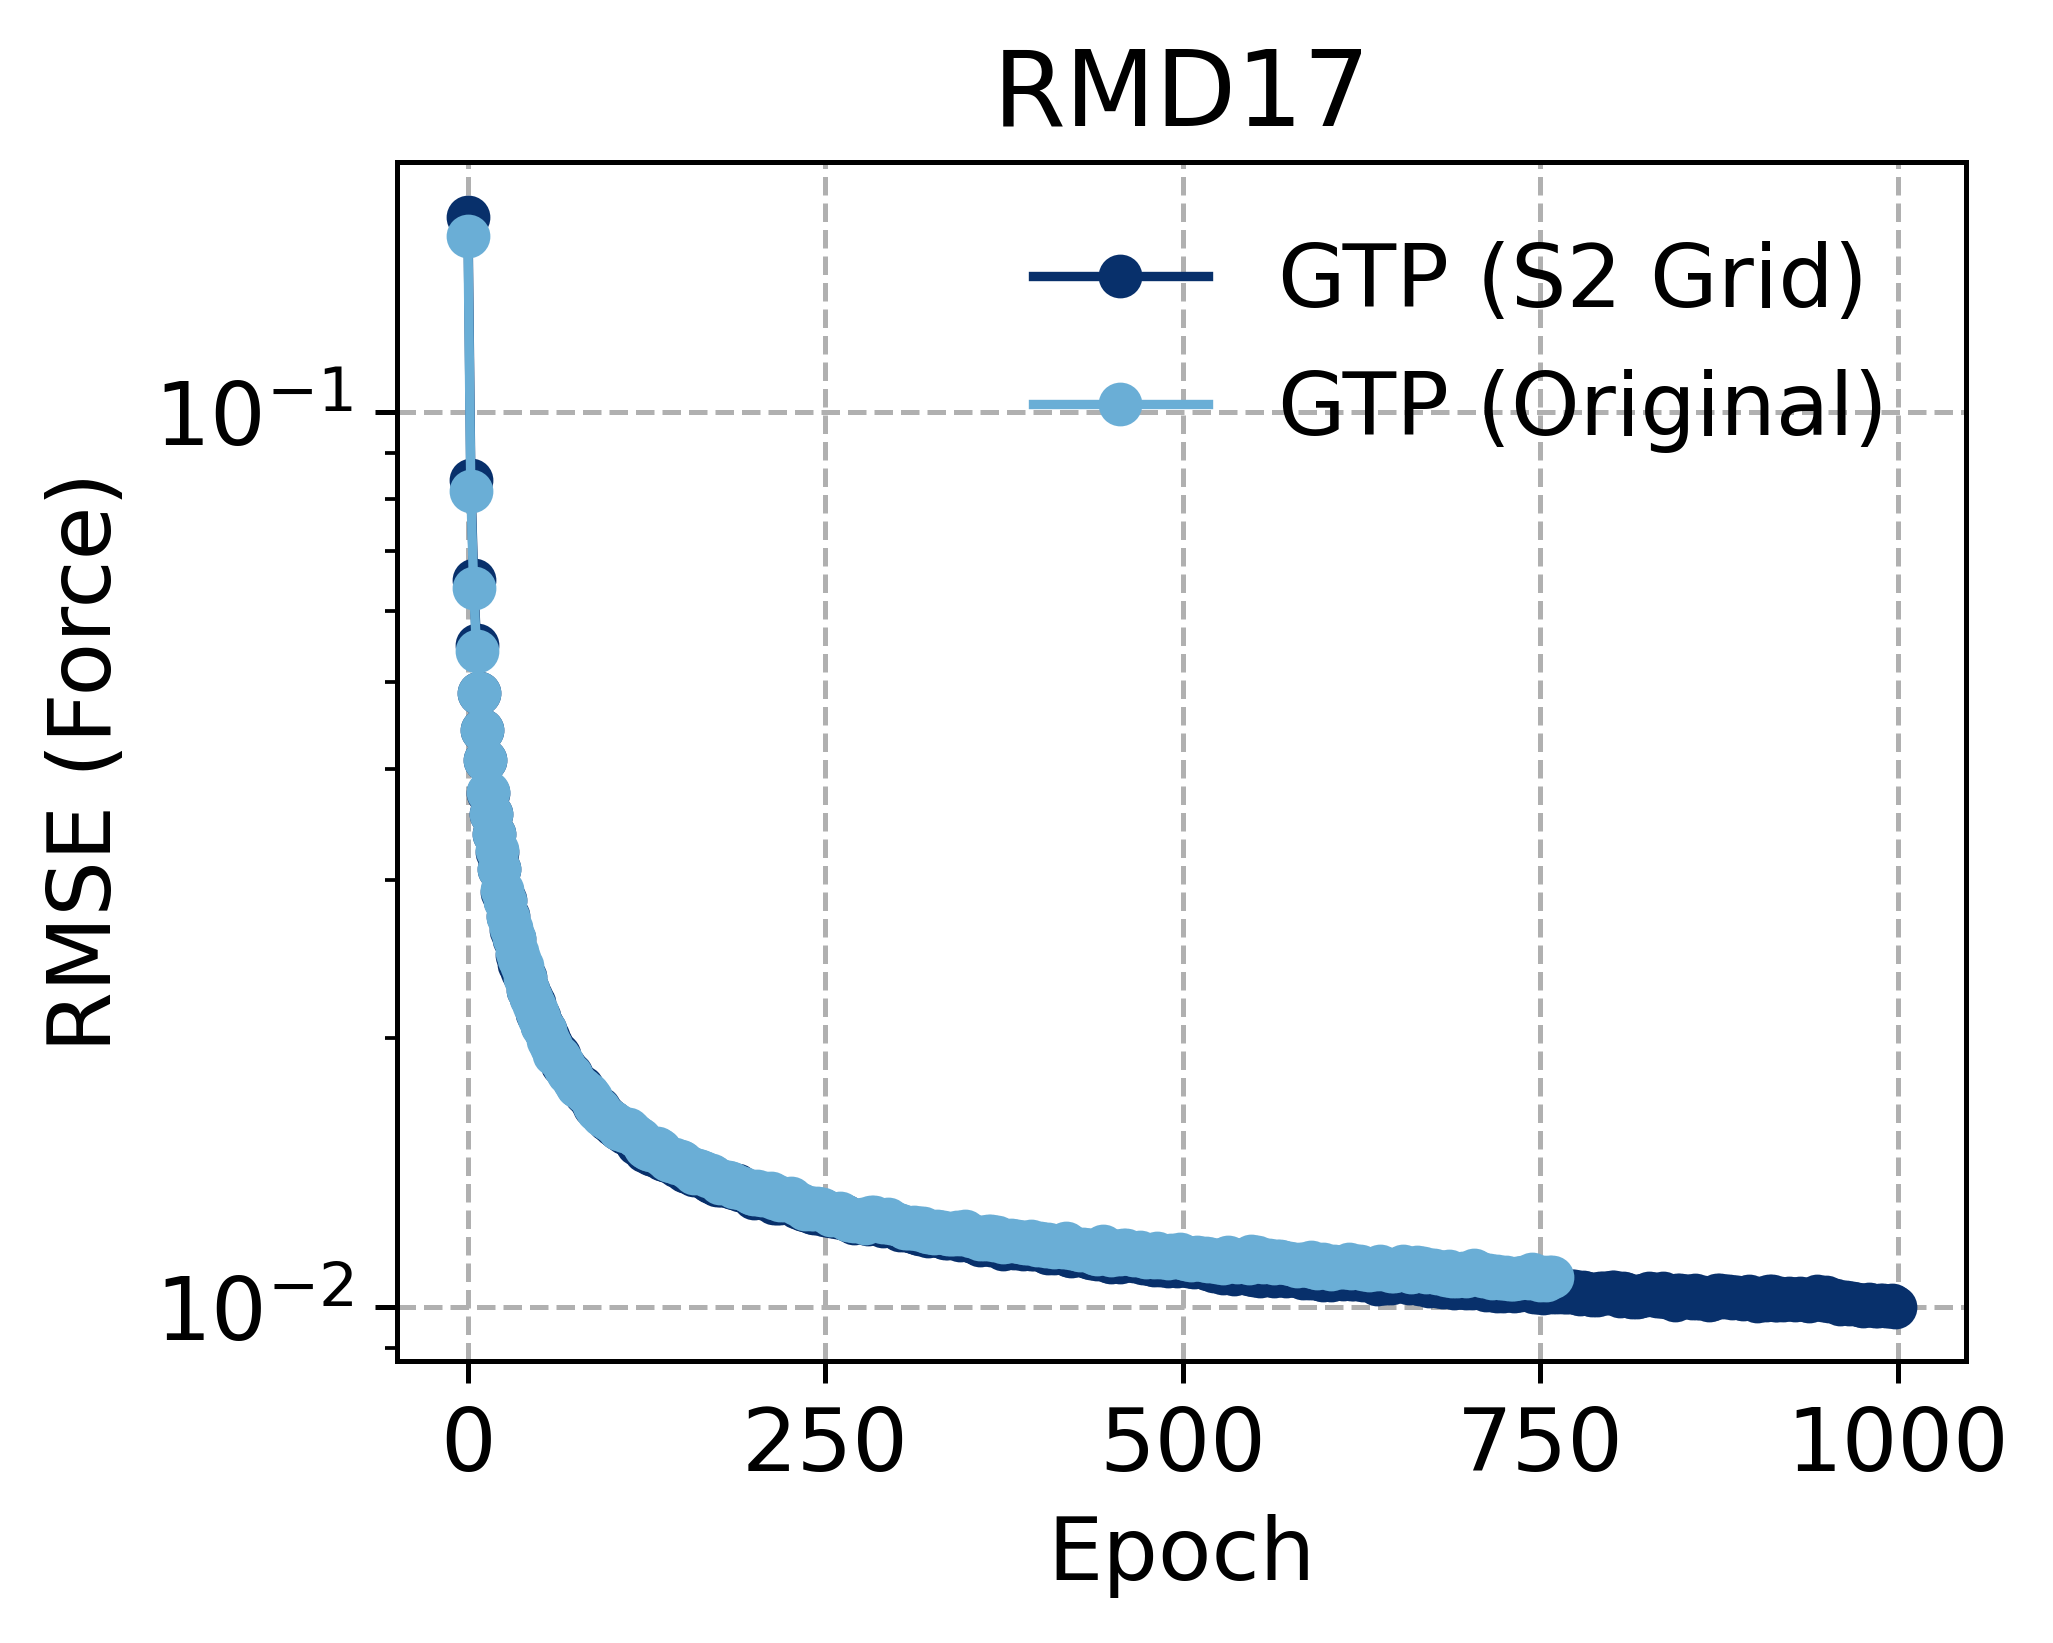

gaunt-s2grid-rmd17_run-6_train 284.8622679710388
gaunt-orig-rmd17_run-6_train 373.8866124153137
gaunt-s2grid-rmd17_run-6_train 1.0
(0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0)
gaunt-orig-rmd17_run-6_train 1.3125171511073055
(0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0)


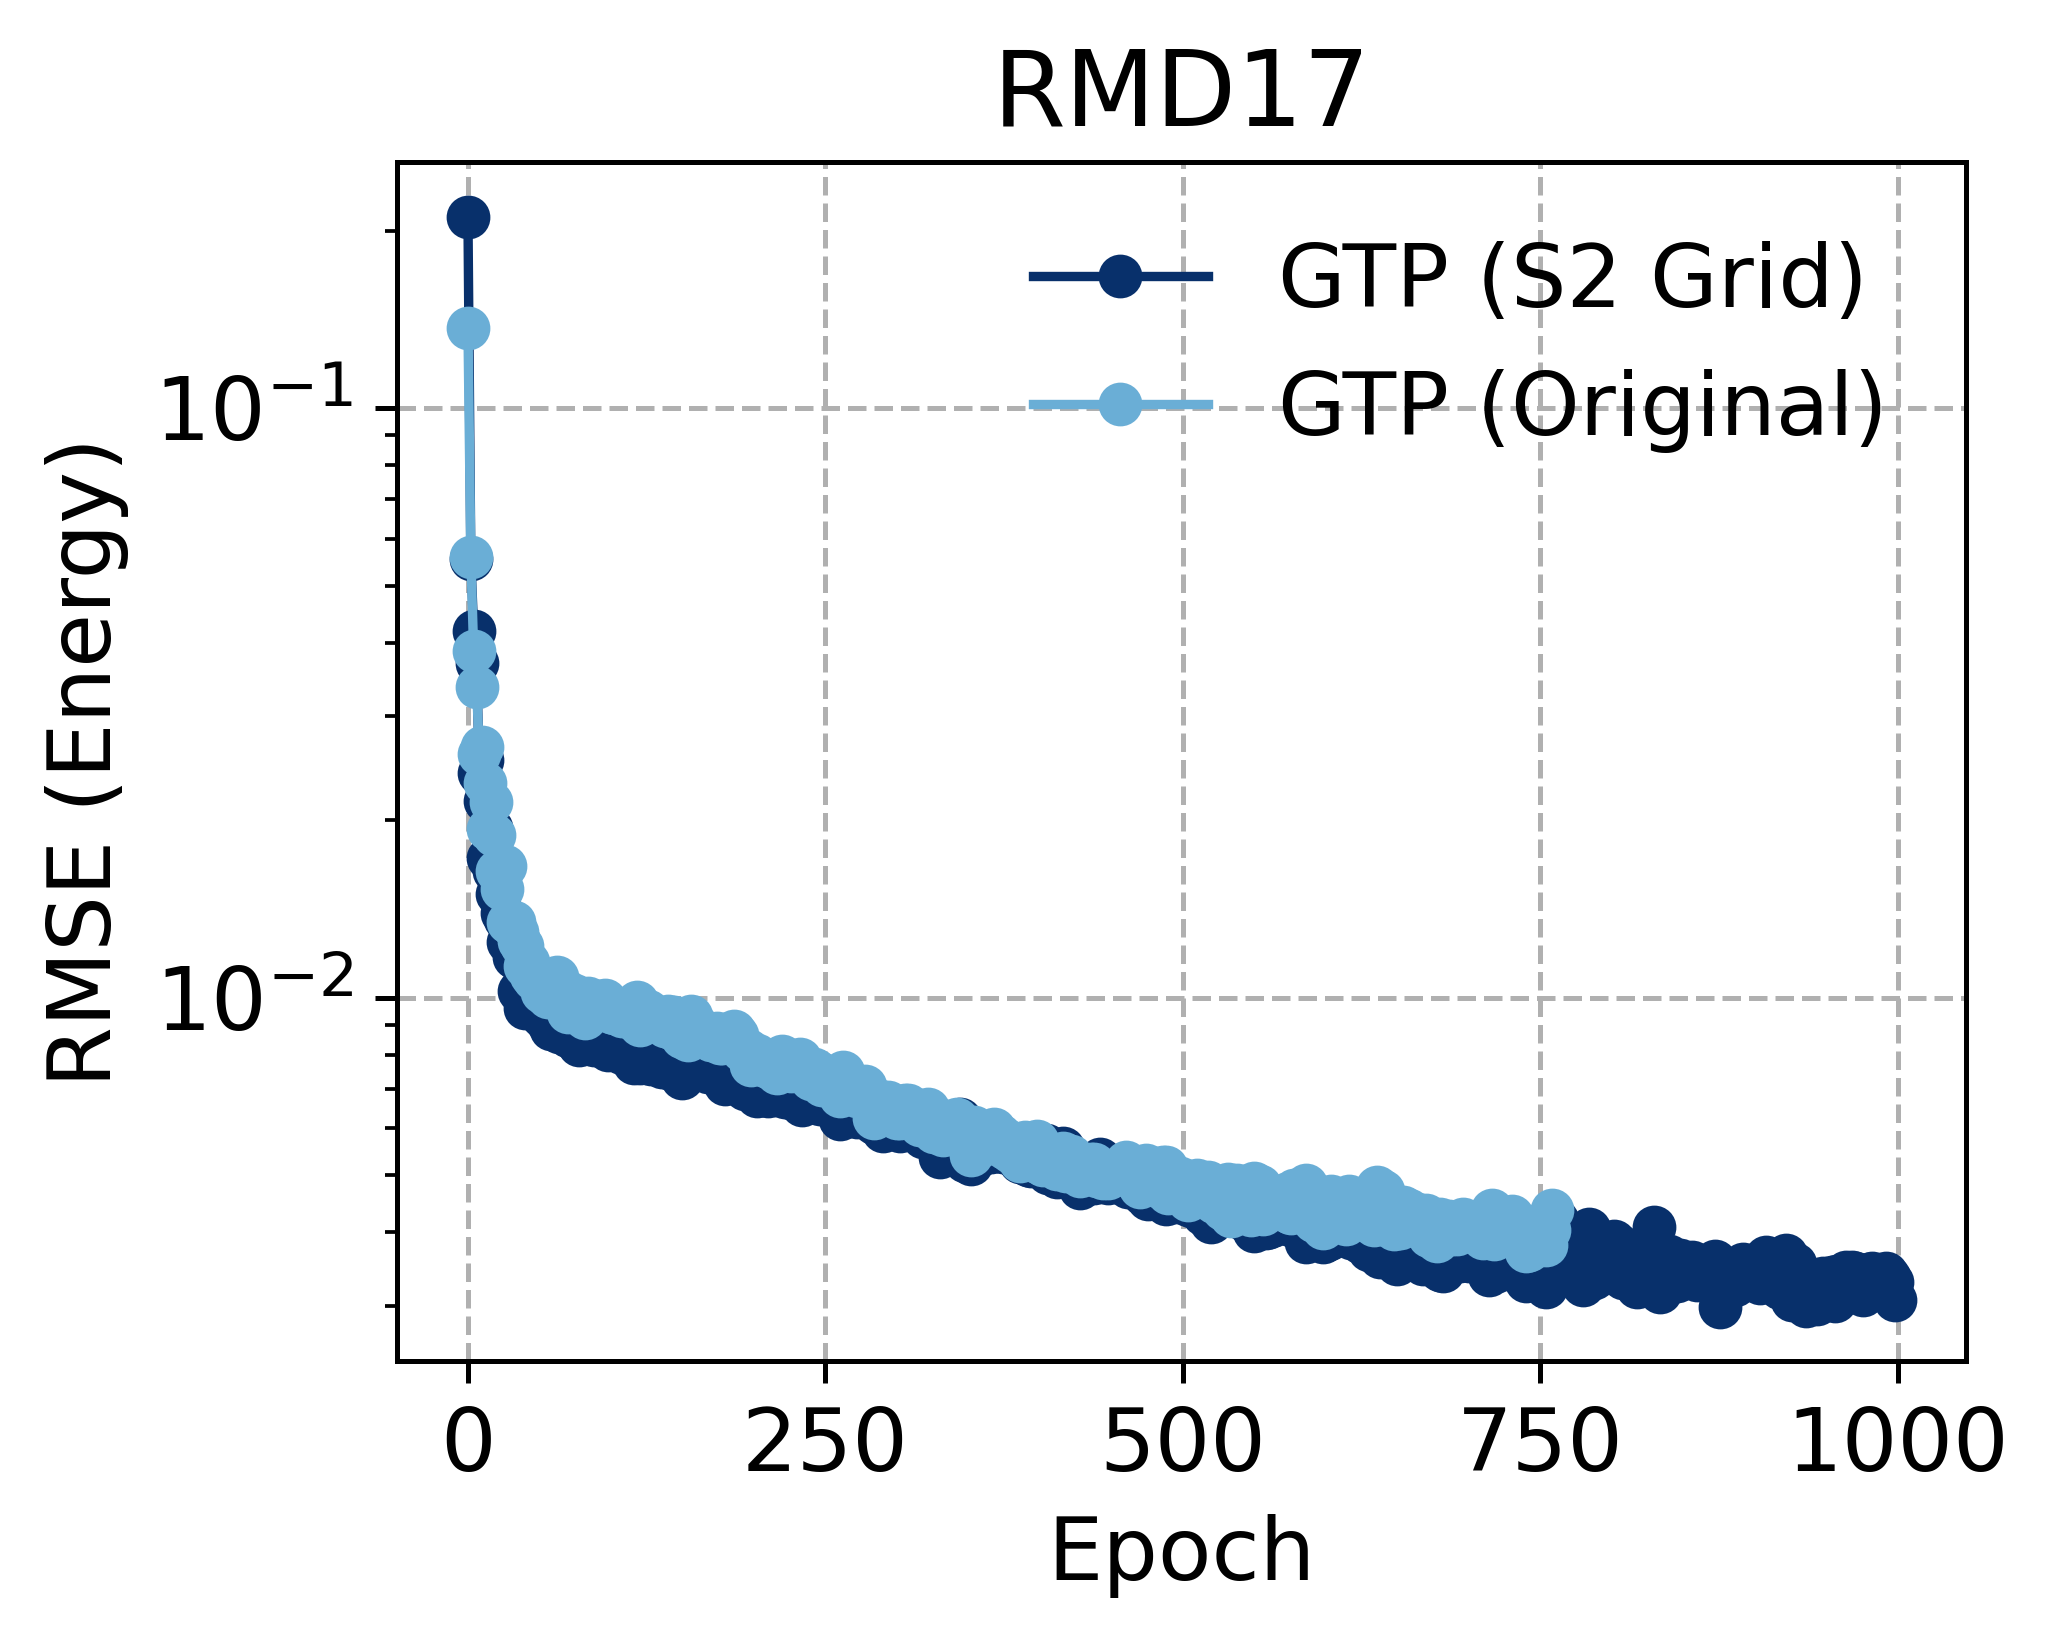

gaunt-s2grid-3bpa_run-6_train 370.78260016441345
gaunt-orig-3bpa_run-6_train 481.4866042137146
gaunt-s2grid-3bpa_run-6_train 1.0
(0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0)
gaunt-orig-3bpa_run-6_train 1.2985684980908285
(0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0)


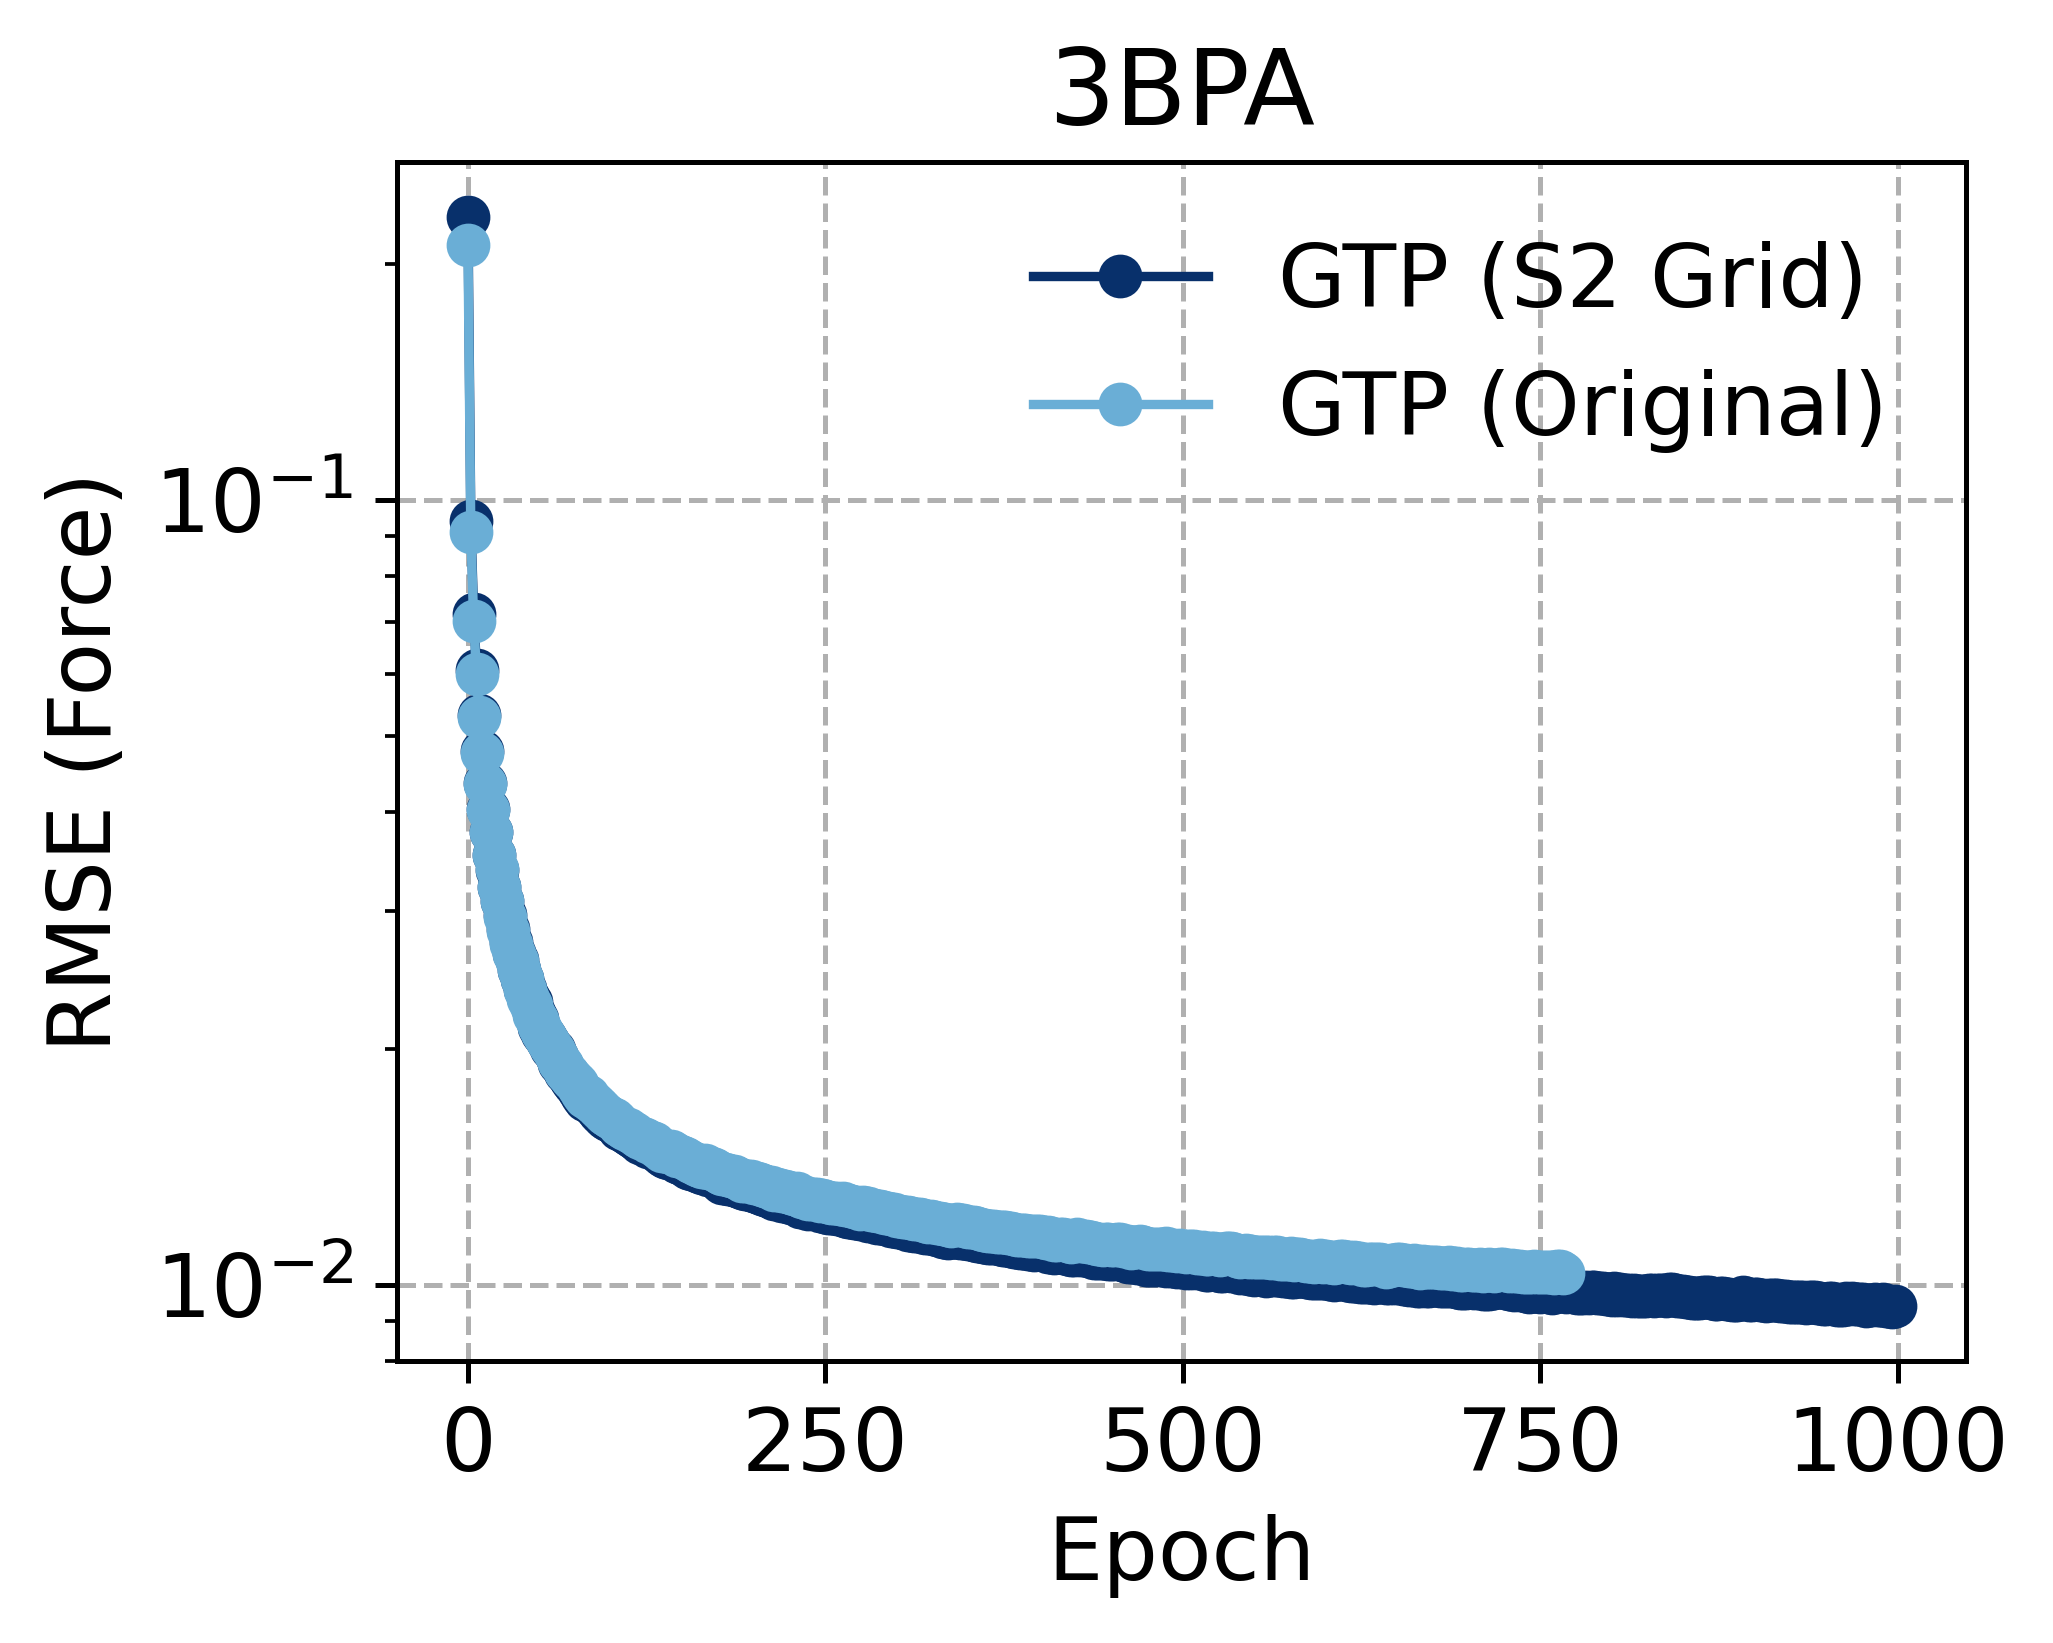

gaunt-s2grid-3bpa_run-6_train 370.78260016441345
gaunt-orig-3bpa_run-6_train 481.4866042137146
gaunt-s2grid-3bpa_run-6_train 1.0
(0.03137254901960784, 0.18823529411764706, 0.4196078431372549, 1.0)
gaunt-orig-3bpa_run-6_train 1.2985684980908285
(0.41708573625528644, 0.6806305267204922, 0.8382314494425221, 1.0)


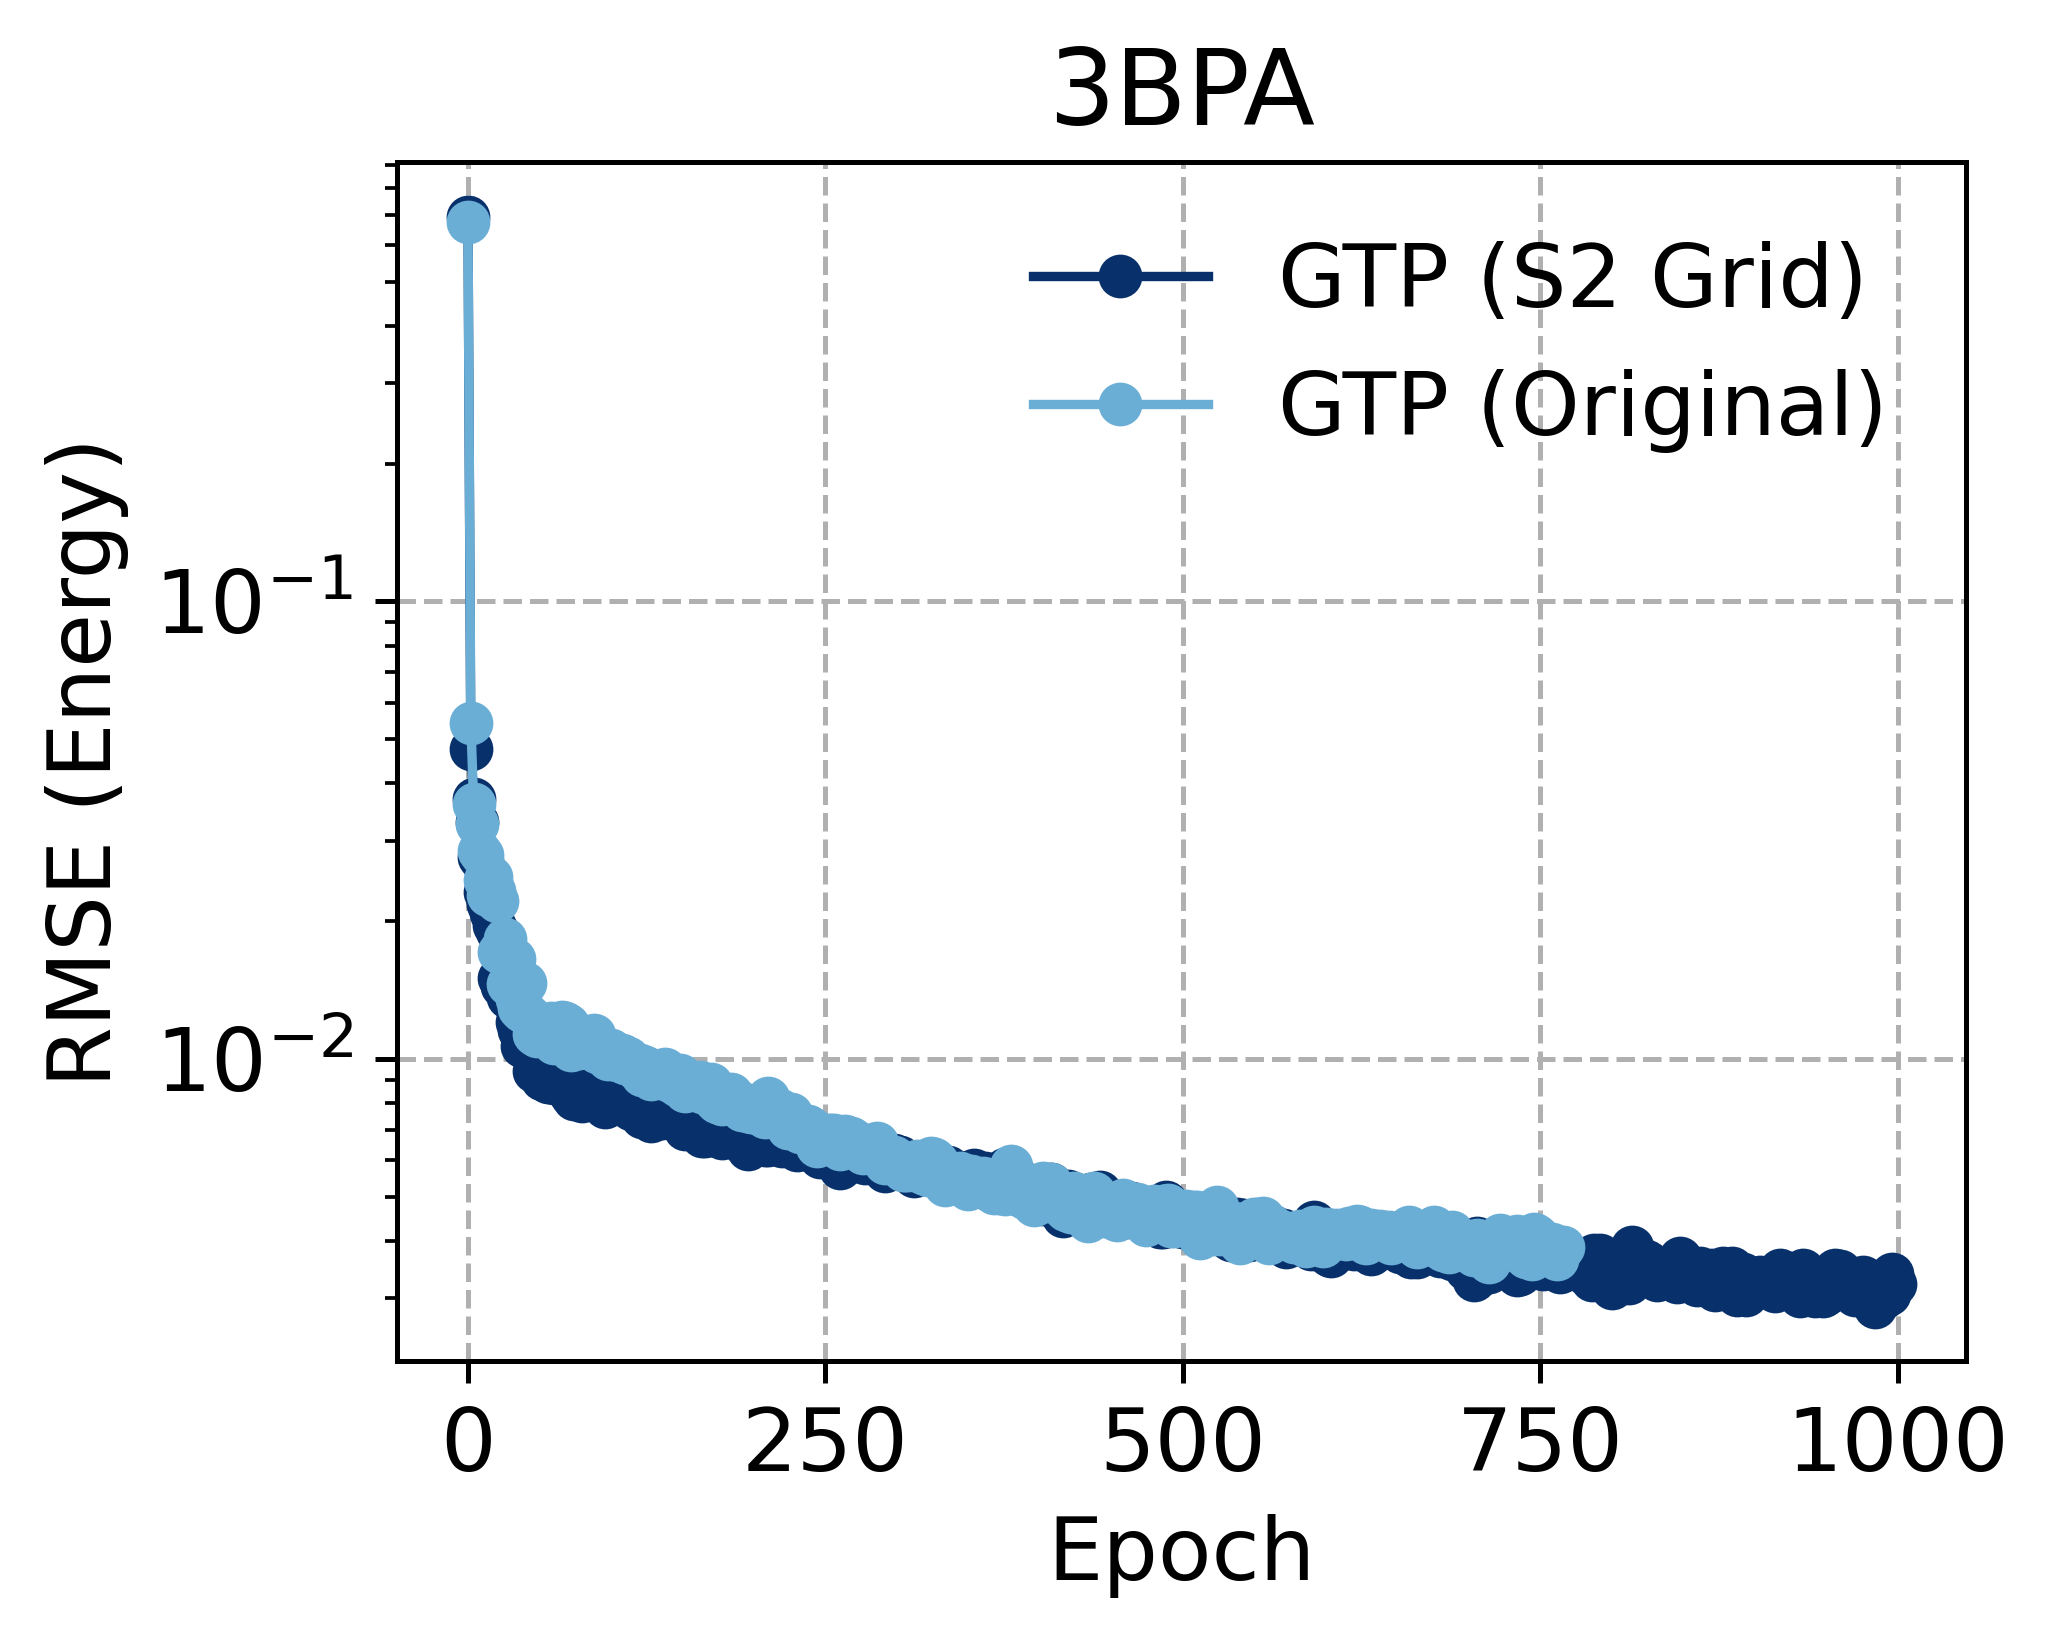

In [56]:
for dataset in ["rmd17", "3bpa"]:
    dataset_df = all_results_dfs[all_results_dfs["dataset"] == dataset]
    for metric_name in ["rmse_f", "rmse_e"]:

        min_time = 1e9
        for results_file in dataset_df["name"].unique():
            df = dataset_df[(dataset_df["name"] == results_file)]
            print(results_file, df["time"].cumsum().max())
            min_time = min(min_time, df["time"].cumsum().max())

        plt.figure()
        for results_file in dataset_df["name"].unique():
            df = dataset_df[(dataset_df["name"] == results_file)]
            print(results_file, df["time"].cumsum().max() / min_time)

            for colorkey in colors.keys():
                if results_file.startswith(colorkey):
                    color = colors[colorkey]
                    break
            
            print(color)
            df = df[df["time"].cumsum() <= min_time]
            plt.plot(df["epoch"], df[metric_name], label=format_results_file_name(results_file), color=color)

        plt.yscale('log')
        plt.xlabel('Epoch')
        # plt.xscale('log')
        plt.ylabel(f'{format_metric_name(metric_name)}')
        plt.legend()
        plt.ticklabel_format(style='plain', axis='x')
        plt.grid(linestyle='--')
        plt.title(f"{format_dataset_name(dataset)}")
        plt.savefig(f"figures/{dataset}-{metric_name}.png", dpi=500)
        plt.show()


In [57]:
# Read all eval results.
all_eval_results = collections.defaultdict(list)

for results_dir in results_dirs:
    for results_file in os.listdir(results_dir):
        if not results_file.endswith("eval.txt"):
            continue

        print(f"Reading {results_file}")
        with open(f"{results_dir}/{results_file}", "r") as f:
            for line in f:
                results = json.loads(line)
                # print(results)
                all_eval_results[results_file].append(results)

all_eval_results_dfs = {}
for results_file, results in all_eval_results.items():
    all_eval_results_dfs[results_file] = pd.DataFrame(results)
    all_eval_results_dfs[results_file]["dataset"] = find_dataset(results_file)
    all_eval_results_dfs[results_file]["name_formatted"] = format_results_file_name(results_file)

# Make a combined dataframe.
all_eval_results_dfs = pd.concat(all_eval_results_dfs.values())
all_eval_results_dfs

# Sort by name_formatted.
all_eval_results_dfs = all_eval_results_dfs.sort_values("name_formatted")


Reading gaunt-s2grid-3bpa_run-6_eval.txt
Reading gaunt-s2grid-rmd17_run-6_eval.txt
Reading vsh-4channel-3bpa_run-6_eval.txt
Reading gaunt-orig-3bpa_run-6_eval.txt
Reading vsh-4channel-rmd17_run-6_eval.txt
Reading vsh-8-channel-rmd17_run-6_eval.txt
Reading gaunt-orig-rmd17_run-6_eval.txt
Reading vsh-8channel-3bpa_run-6_eval.txt


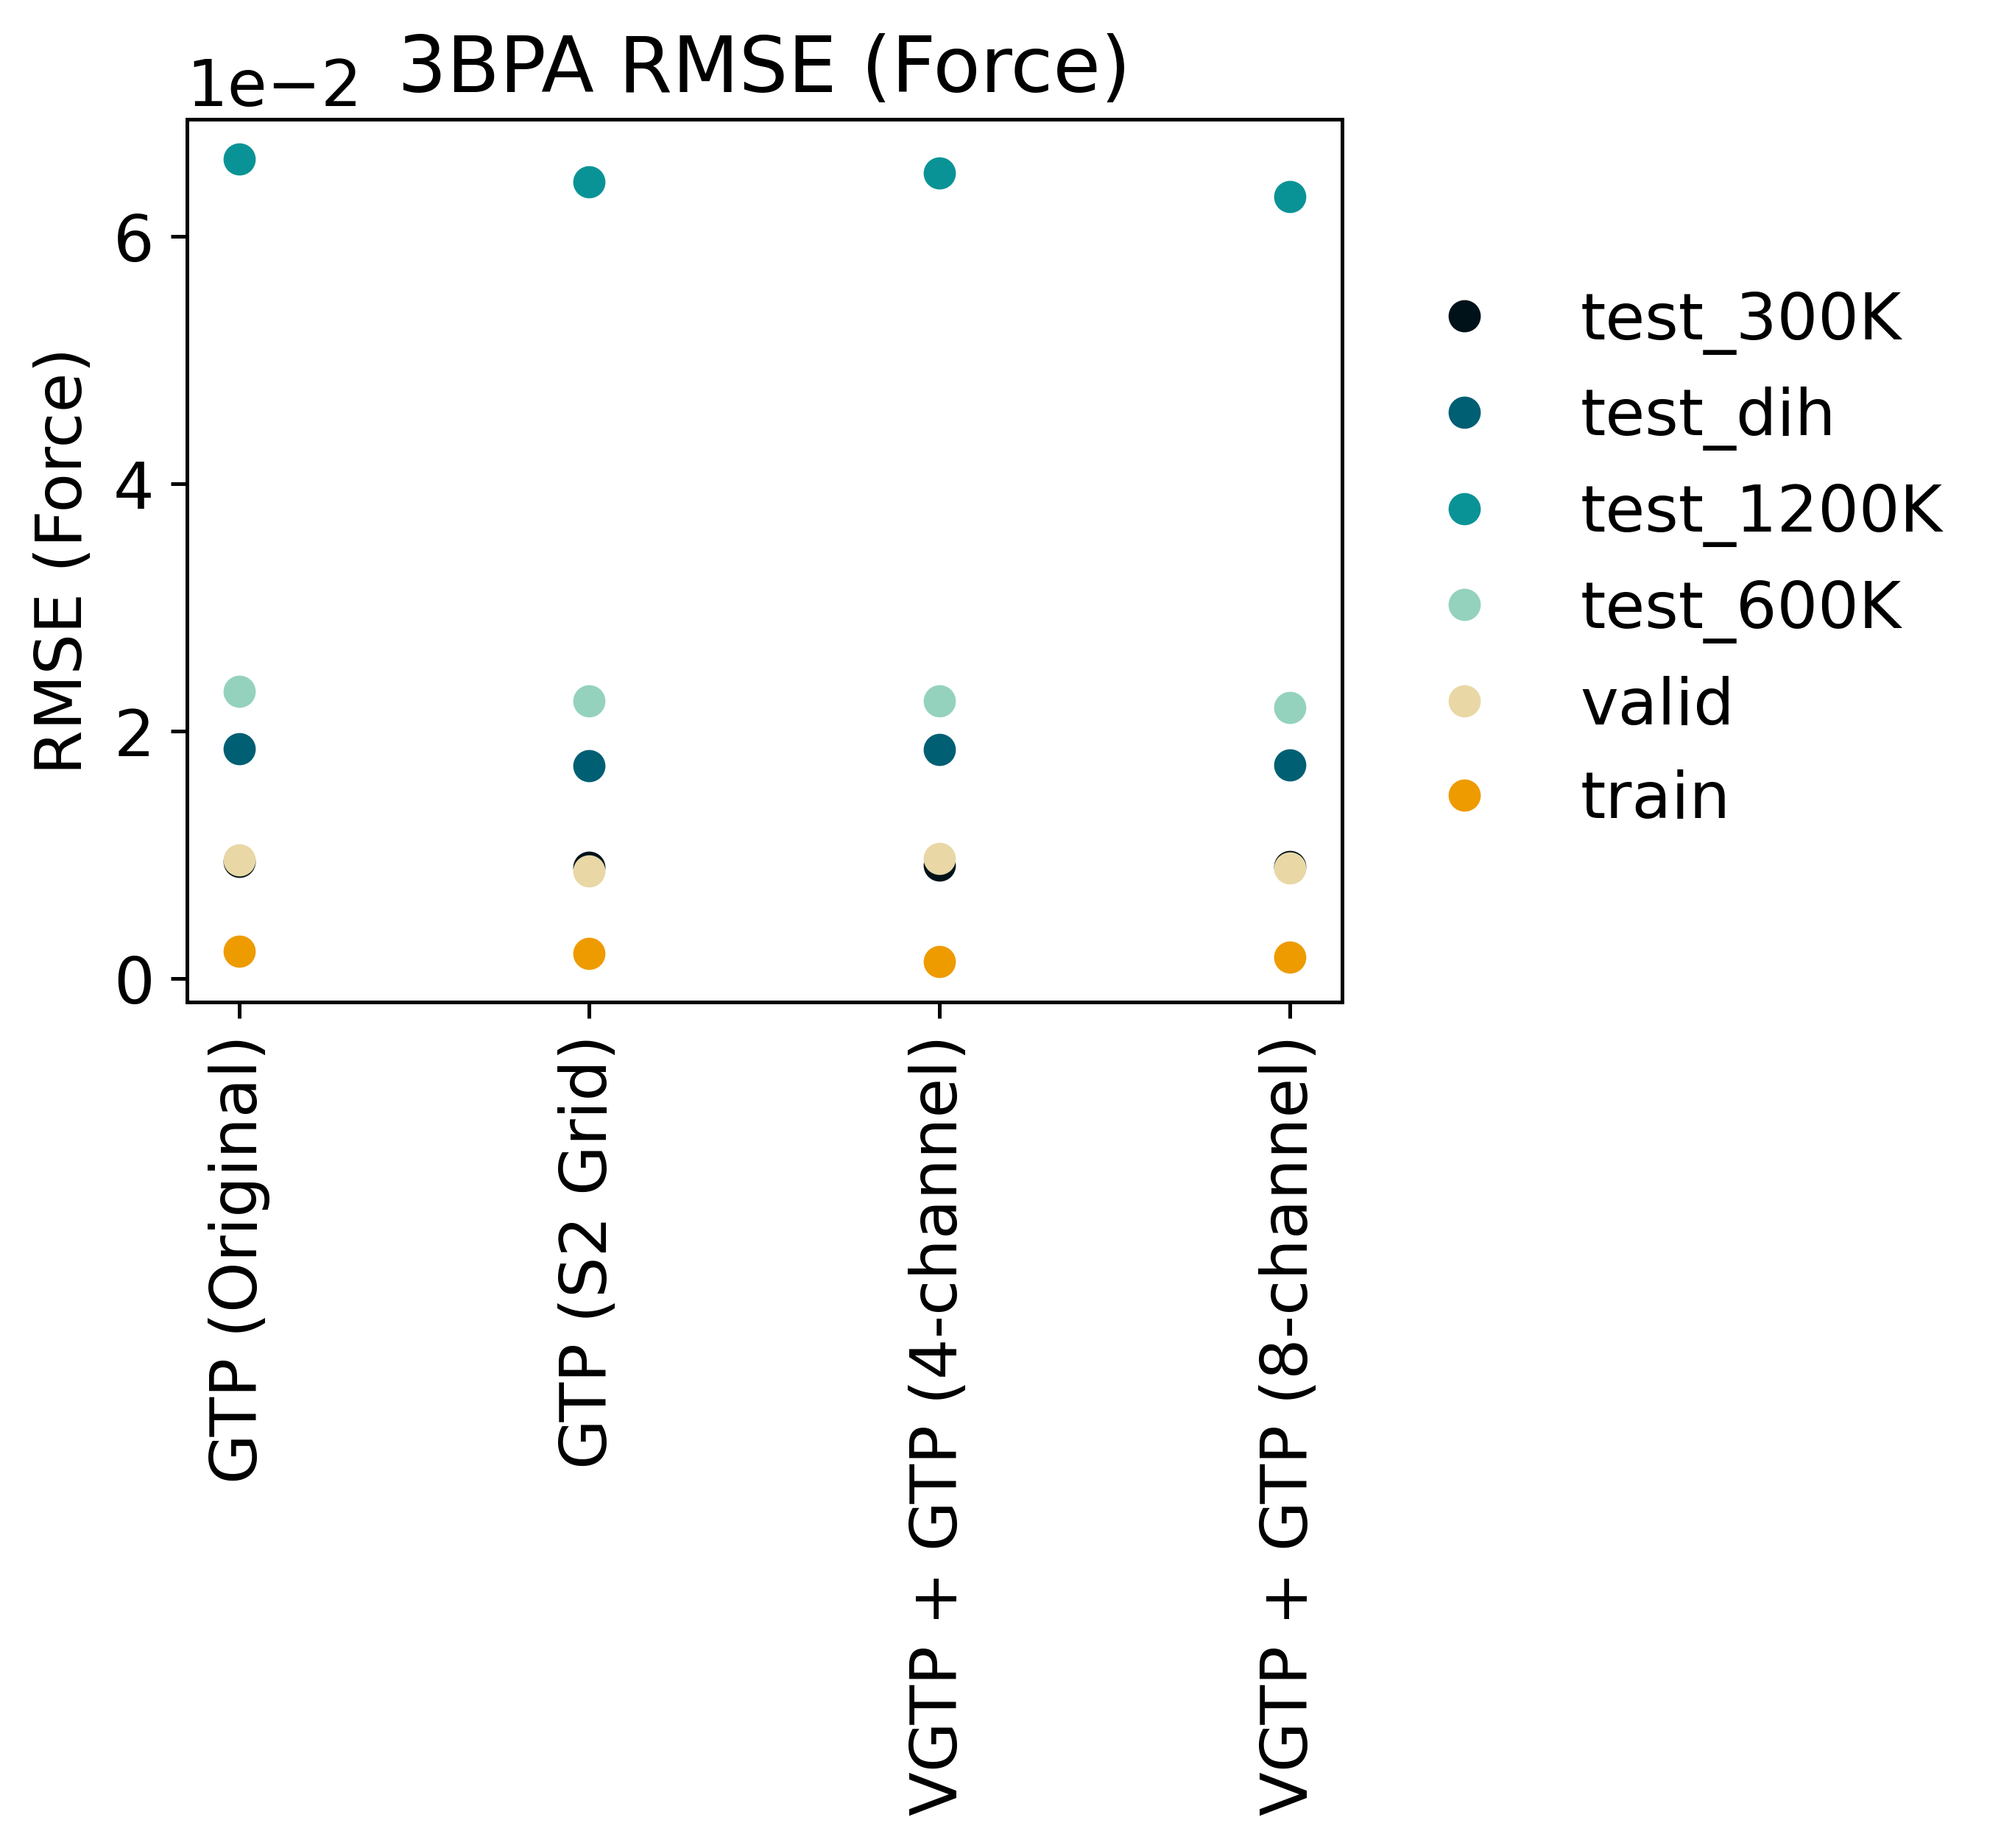

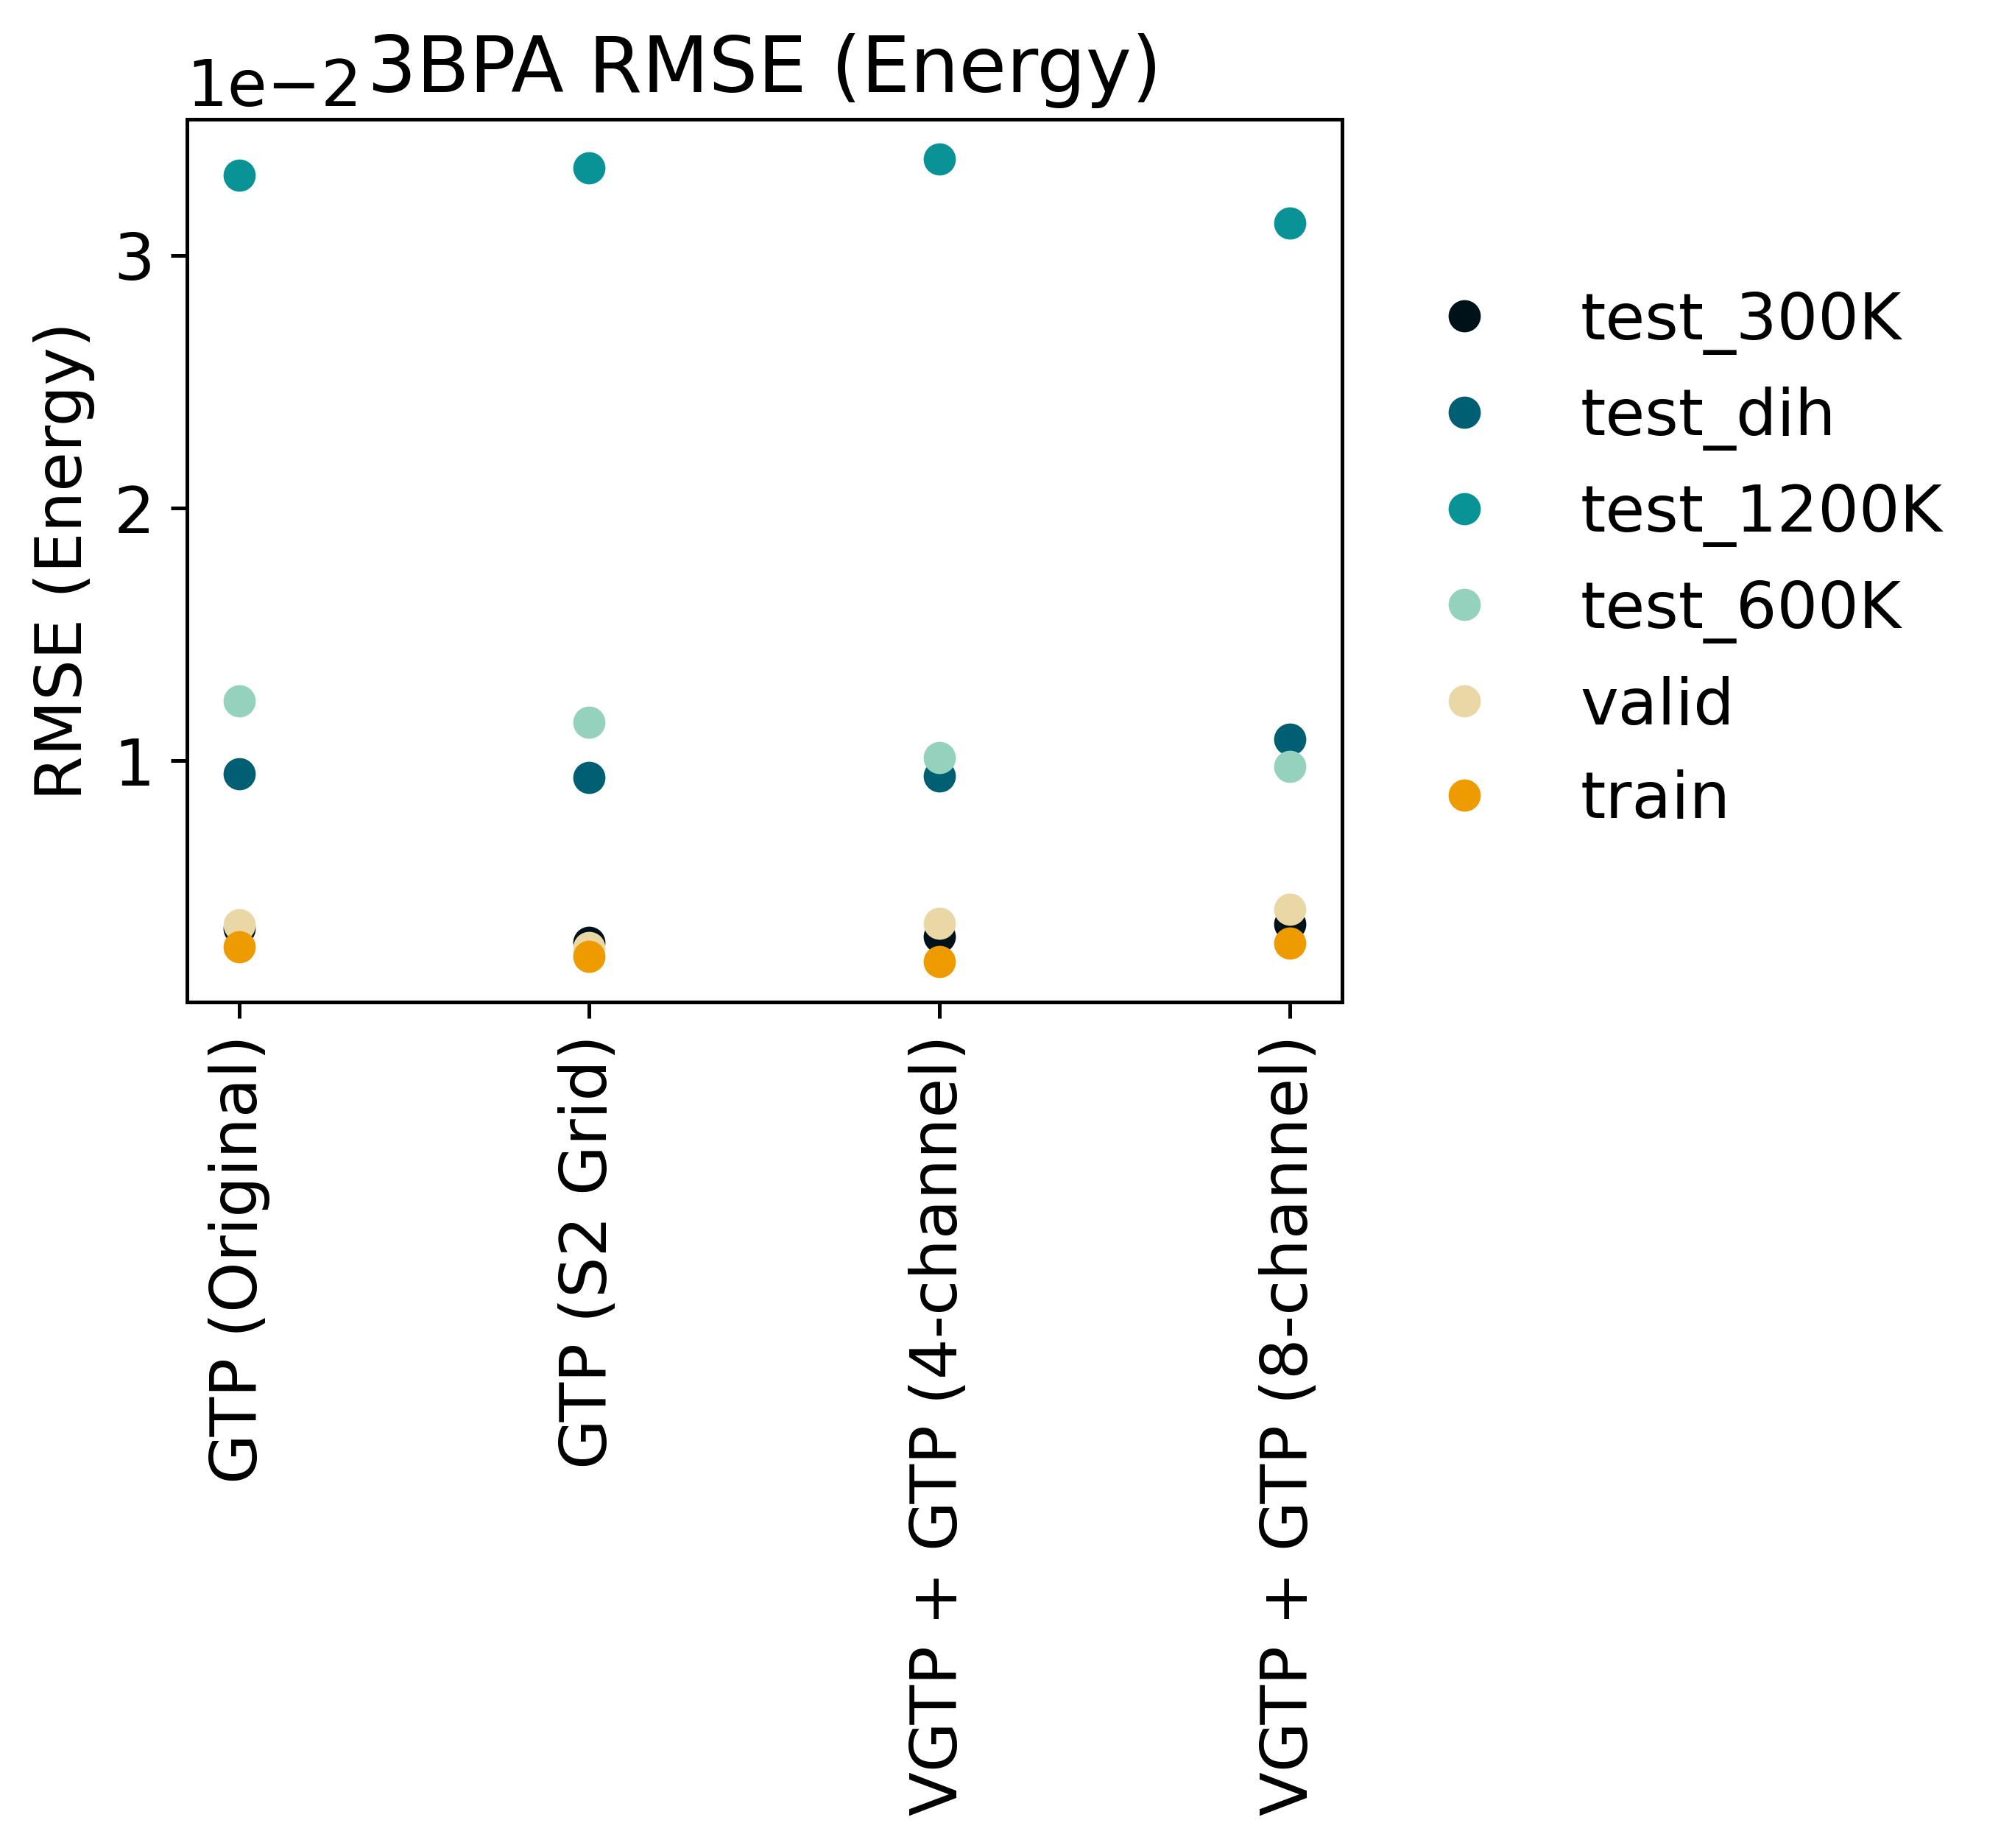

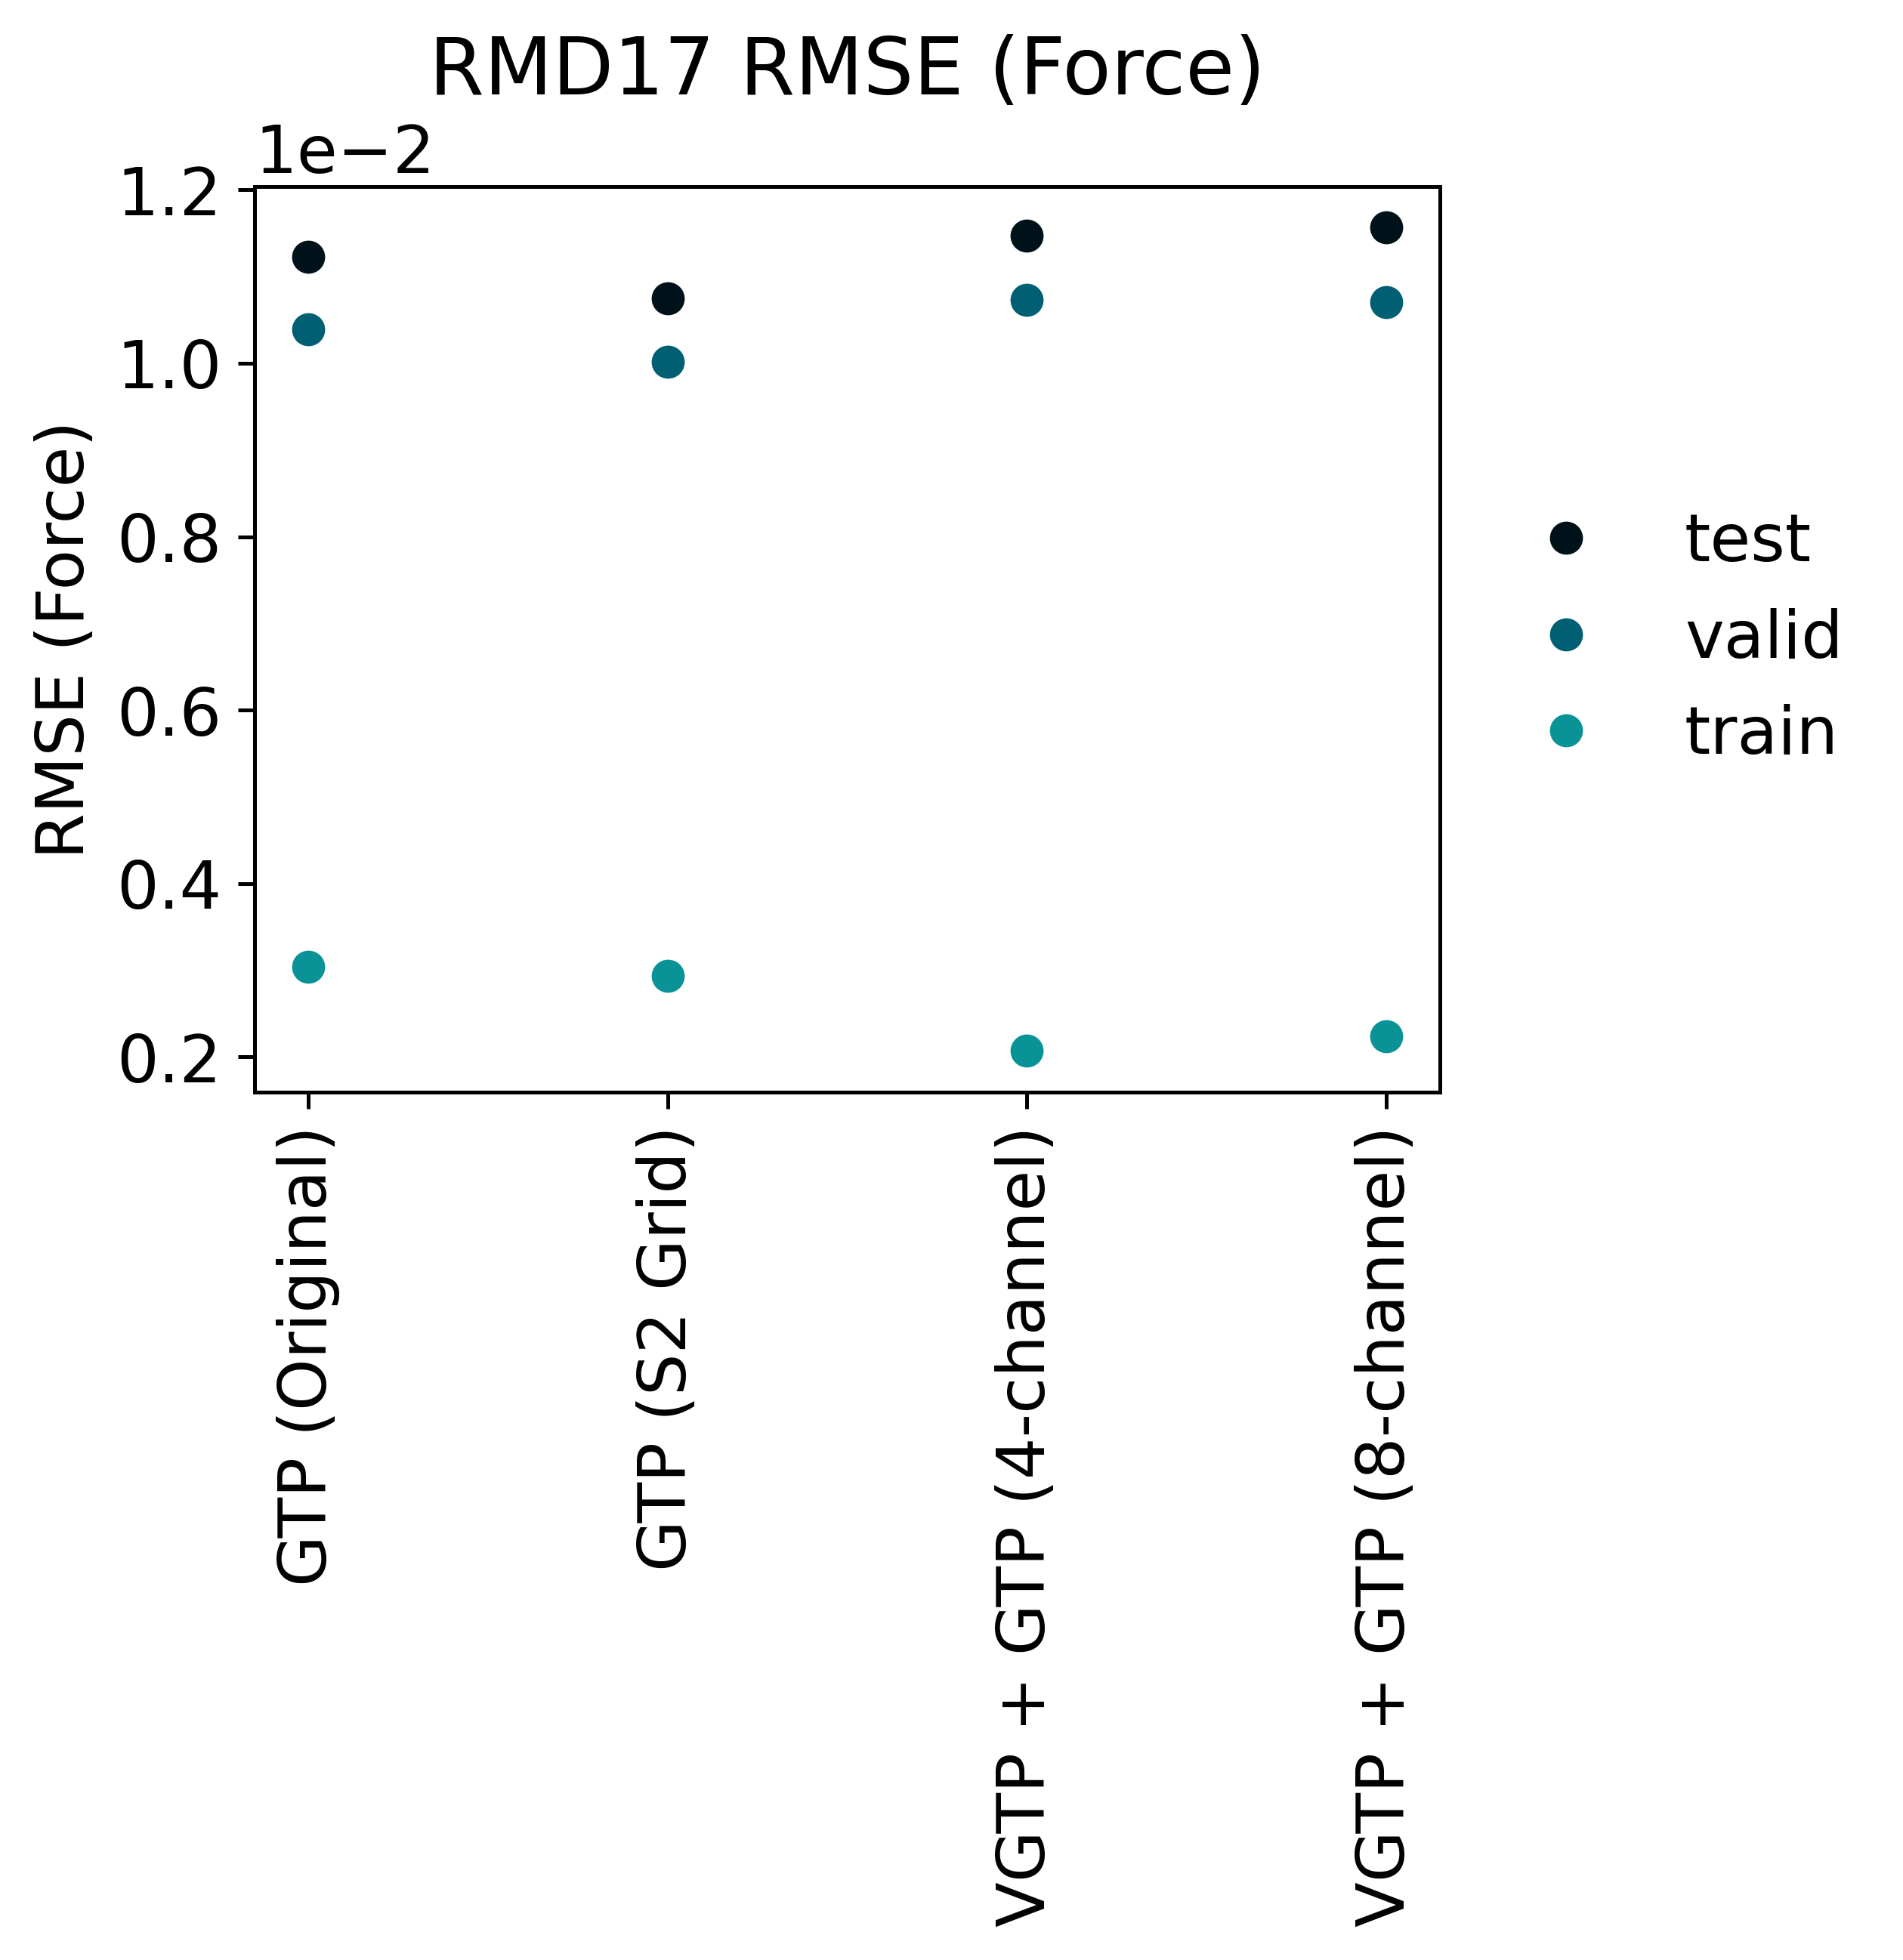

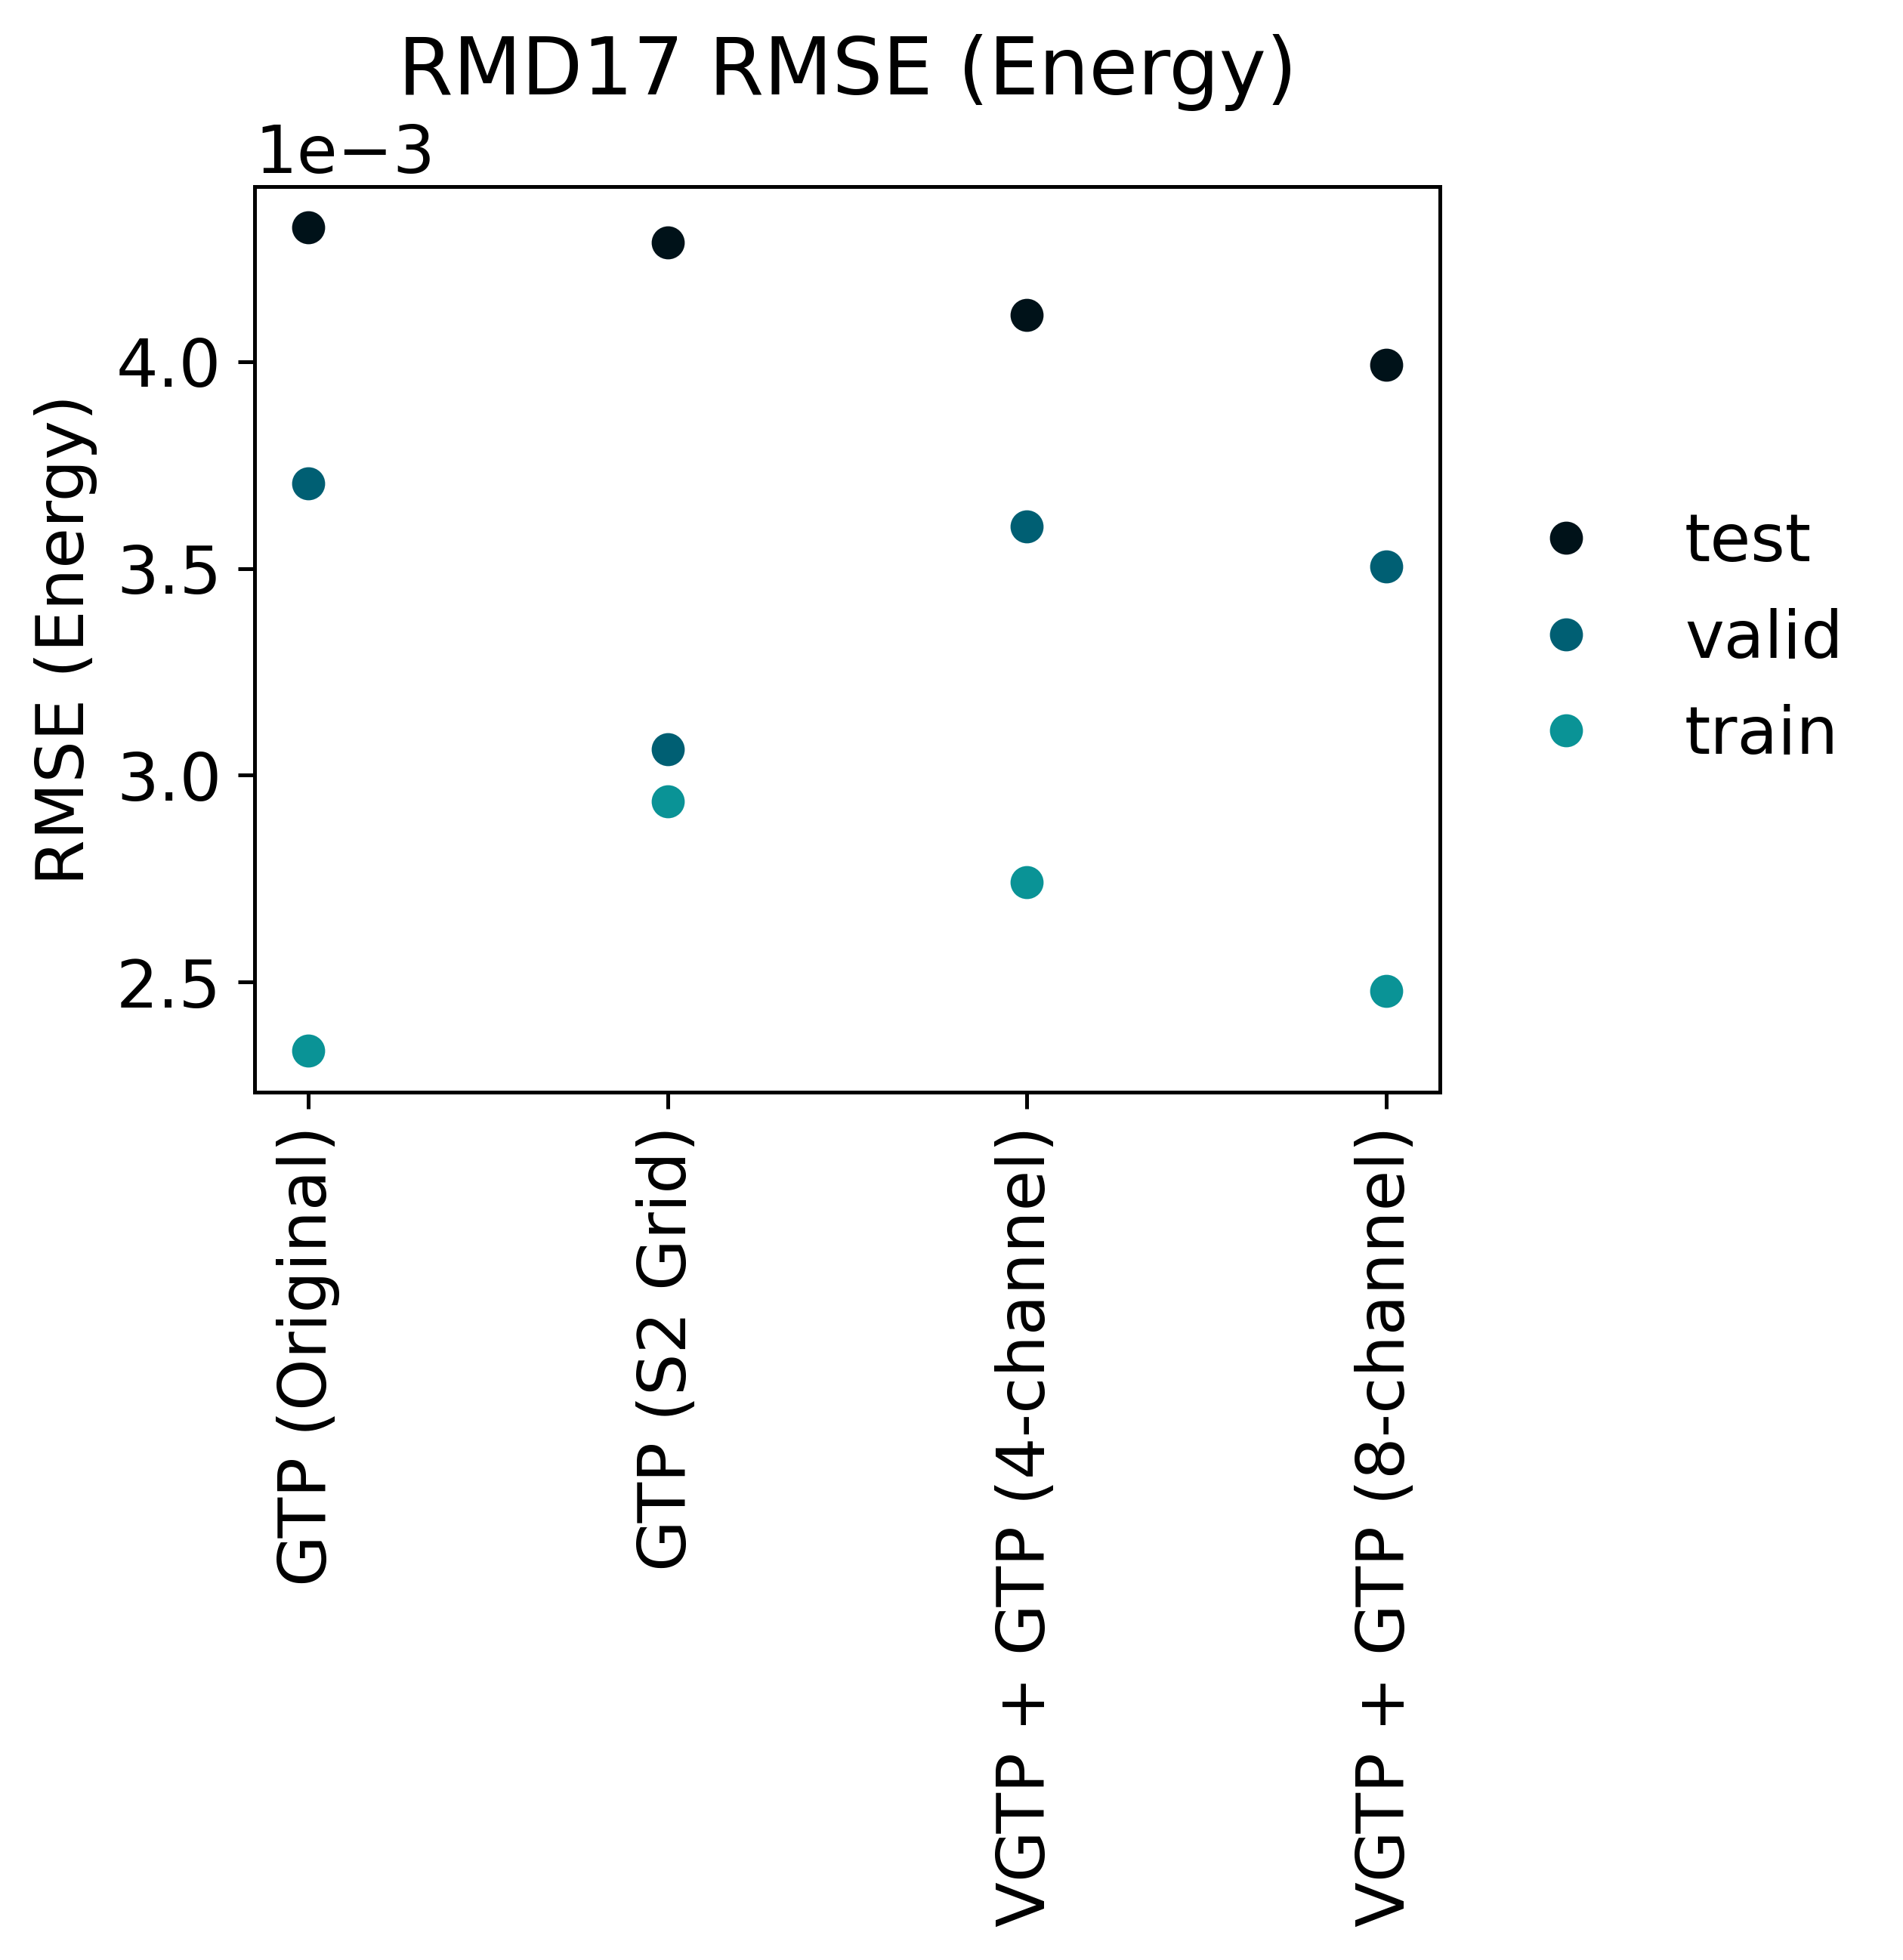

In [58]:
for dataset in all_eval_results_dfs["dataset"].unique():
    dataset_results = all_eval_results_dfs[all_eval_results_dfs["dataset"] == dataset]
    for metric_name in ["rmse_f", "rmse_e"]:
        for subset in dataset_results["subset"].unique():
            subset_results = dataset_results[dataset_results["subset"] == subset]
            plt.plot(subset_results["name_formatted"], subset_results[metric_name], label=subset, marker="o", linestyle="")

        # Place the legend outside the plot.
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.xticks(rotation=90)
        plt.ylabel(format_metric_name(metric_name))
        plt.title(f"{format_dataset_name(dataset)} {format_metric_name(metric_name)}")
        plt.show()



In [59]:
for results_file, df in all_eval_results_dfs.items():
    subsets = list(df["subset"])
    break

print(subsets)
for subset in subsets:
    for metric_name in ["rmse_f", "rmse_e"]:
        names = []
        metrics = []
        
        for index, (results_file, df) in enumerate(sorted(all_eval_results_dfs.items())):
            if "3bpa" not in results_file:
                continue
            name = format_results_file_name(results_file)
            metric = float(df[df["subset"] == subset][metric_name])
            metrics.append(metric)
            names.append(name)


        plt.scatter(x=names, y=metrics)
        plt.xticks(
            ticks=range(len(names)),
            labels=names,
            rotation=90
        )
        plt.ylabel(format_metric_name(metric_name))
        plt.title(subset)
        plt.show()
        # print(df[df["subset"] == subset]["rmse_f"])
        # plt.plot(df[df["subset"] == subset]["epoch"], df[df["subset"] == subset]["rmse_e"], label=format_results_file_name(results_file))

KeyError: 'subset'

In [89]:
results_file = "/home/ameyad/Gaunt-Tensor-Product/force-field-modeling-3bpa/results/all_results.txt"
with open(results_file) as f:
    runs = []
    current_run = []
    for line in f.readlines():
        data = json.loads(line)
        
        if len(current_run) > 0:
            last_epoch = current_run[-1]["epoch"]
            if last_epoch != data["epoch"]:
                print(last_epoch, data["epoch"])
            if last_epoch > data["epoch"]:
                print(f"Epoch {last_epoch} is greater than {data['epoch']}")
                runs.append(current_run)
                print(f"Finishing current run at epoch {last_epoch}")
                current_run = []
        
        current_run.append(data)
    
    if len(current_run) > 0:
        runs.append(current_run)
        print(f"Finishing current run at epoch {current_run[-1]['epoch']}")



FileNotFoundError: [Errno 2] No such file or directory: '/home/ameyad/Gaunt-Tensor-Product/force-field-modeling-3bpa/results/all_results.txt'